In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation
from scipy import fftpack
from matplotlib import pyplot as plt

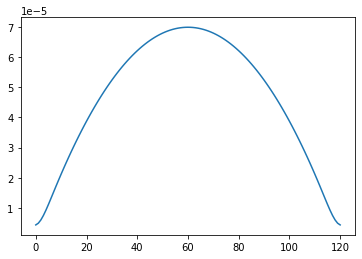

In [19]:
amplitude = 10000
sim_width = 0.012e-3
pixel_size = 0.1e-6 
n_slices = 1000

lens = Lens.Lens(
    diameter=sim_width,
    height=70e-6,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens.generate_profile(pixel_size=pixel_size)

centre_px = (len(lens.profile)-1)//2

plt.plot(lens.profile)
plt.show()

In [21]:
f=60e-3
print(f'Lens diameter: {lens.diameter}')
equivalent_radius_of_curvature = 0.5 * (
    lens.height + (lens.diameter / 2) ** 2 / lens.height
)

print(equivalent_radius_of_curvature*1e3)

# print((lens.height**2 + (lens.diameter/2)**2)/(2*lens.height))

medium = Lens.Medium(1.0)

equivalent_focal_distance = (
    equivalent_radius_of_curvature * medium.refractive_index
) / (lens.medium.refractive_index - medium.refractive_index)

print(equivalent_focal_distance*1e3)

print('height to get f:')
height=np.sqrt((2*f*(lens.medium.refractive_index-medium.refractive_index))/medium.refractive_index-(lens.diameter/2)**2)
print(height)

a = 1
b = -2*f*(lens.medium.refractive_index-medium.refractive_index)/medium.refractive_index
c = -(lens.diameter/2)**2

print(f'a: {a}')
print(f'b: {b}')
print(f'c: {c}')

h1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
h2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
print(h1)
print(h2)


Lens diameter: 1.2e-05
0.035257142857142855
0.026155150487494703
height to get f:
0.4021939830032269
a: 1
b: -0.16176
c: -3.6000000000000005e-11
0.1617600002225519
-2.2255192133613377e-10


In [22]:
lens_h1 = Lens.Lens(
    diameter=sim_width,
    height=h1,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens_h1.generate_profile(pixel_size=pixel_size)

print(Simulation.calculate_equivalent_focal_distance(lens_h1, medium))


0.060000000165097864


In [23]:
lens_h2 = Lens.Lens(
    diameter=sim_width,
    height=h2,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens_h2.generate_profile(pixel_size=pixel_size)

print(Simulation.calculate_equivalent_focal_distance(lens_h2, medium))


-0.060000002090327346
